# Logistic Regression for Network Ads

#### 250 example dataset. Contains 2 independent variables 'Age' and 'Expected Sallery' (the feature matrix coefficient values) and the dependant variable vector 'Purchased' (y). In this example we have a linear classifier as shown in the 'Model Visualization' section. This classifier should classify or label a potential buyer based on the independent variables corralation with the dependent variable. Based on the features / independent variables, the prediction can either result in True/1 or False/0. We need to predict a label on whether or not the customer is labled or classified as a statistically potential byer. Thus, qualifying this as a classification case. In this case feature scaling and more specifically standard scaling is applied. Standard scaling removes the mean and scales each feature/variable to unit variance values between -3 and 3. This is done to assure low values are not ignored by the model. The scaling must only be applied after the Train and Test set split to secure against information leakage -  aTest set is supposed to be completely hidden from the Train set.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preprocessing

### Import Dataset

In [2]:
dataset = pd.read_csv('Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Splitting the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
X_train

array([[    39,  71000],
       [    28,  59000],
       [    28,  44000],
       [    31,  15000],
       [    19,  25000],
       [    60, 102000],
       [    53, 143000],
       [    46,  22000],
       [    22,  81000],
       [    47,  25000],
       [    41,  51000],
       [    32, 117000],
       [    33,  60000],
       [    19,  76000],
       [    28,  89000],
       [    25,  87000],
       [    40,  75000],
       [    29,  83000],
       [    24,  19000],
       [    49,  28000],
       [    20,  74000],
       [    28, 123000],
       [    35,  91000],
       [    27,  17000],
       [    32,  18000],
       [    27,  57000],
       [    26,  35000],
       [    46,  23000],
       [    31,  74000],
       [    37, 144000],
       [    27,  20000],
       [    23,  48000],
       [    20,  82000],
       [    31,  34000],
       [    48,  29000],
       [    20,  82000],
       [    33,  41000],
       [    27,  58000],
       [    35,  22000],
       [    30,  80000],


In [5]:
X_test

array([[    41,  52000],
       [    29, 148000],
       [    18,  52000],
       [    26,  15000],
       [    24,  89000],
       [    33, 113000],
       [    23,  20000],
       [    32, 135000],
       [    46,  96000],
       [    35,  58000],
       [    35,  25000],
       [    49,  74000],
       [    35,  88000],
       [    35,  47000],
       [    25,  90000],
       [    39, 134000],
       [    24,  55000],
       [    35,  75000],
       [    42,  80000],
       [    26,  15000],
       [    41,  71000],
       [    23,  63000],
       [    37,  33000],
       [    35,  50000],
       [    28,  84000],
       [    52, 114000],
       [    30,  49000],
       [    37,  71000],
       [    32, 120000],
       [    38,  80000],
       [    40,  59000],
       [    25,  33000],
       [    28,  32000],
       [    59,  83000],
       [    26,  84000],
       [    27,  58000],
       [    48,  41000],
       [    39,  61000],
       [    20,  86000],
       [    34,  43000],


In [6]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [7]:
y_test

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
X_train

array([[ 0.62172286,  0.16417863],
       [-0.50000992, -0.18817396],
       [-0.50000992, -0.6286147 ],
       [-0.1940828 , -1.48013346],
       [-1.41779128, -1.1865063 ],
       [ 2.76321271,  1.07442282],
       [ 2.04938276,  2.27829416],
       [ 1.33555281, -1.27459445],
       [-1.11186416,  0.45780578],
       [ 1.43752852, -1.1865063 ],
       [ 0.82567427, -0.42307569],
       [-0.09210709,  1.51486355],
       [ 0.00986862, -0.15881125],
       [-1.41779128,  0.31099221],
       [-0.50000992,  0.69270751],
       [-0.80593704,  0.63398208],
       [ 0.72369857,  0.28162949],
       [-0.39803421,  0.51653122],
       [-0.90791275, -1.3626826 ],
       [ 1.64147993, -1.09841815],
       [-1.31581558,  0.25226677],
       [-0.50000992,  1.69103985],
       [ 0.21382003,  0.75143294],
       [-0.60198563, -1.42140803],
       [-0.09210709, -1.39204531],
       [-0.60198563, -0.2468994 ],
       [-0.70396133, -0.89287914],
       [ 1.33555281, -1.24523173],
       [-0.1940828 ,

In [10]:
X_test

array([[ 0.82567427, -0.39371297],
       [-0.39803421,  2.42510774],
       [-1.51976699, -0.39371297],
       [-0.70396133, -1.48013346],
       [-0.90791275,  0.69270751],
       [ 0.00986862,  1.39741269],
       [-1.00988846, -1.33331988],
       [-0.09210709,  2.04339244],
       [ 1.33555281,  0.89824652],
       [ 0.21382003, -0.21753668],
       [ 0.21382003, -1.1865063 ],
       [ 1.64147993,  0.25226677],
       [ 0.21382003,  0.66334479],
       [ 0.21382003, -0.54052655],
       [-0.80593704,  0.72207023],
       [ 0.62172286,  2.01402972],
       [-0.90791275, -0.30562483],
       [ 0.21382003,  0.28162949],
       [ 0.92764998,  0.42844307],
       [-0.70396133, -1.48013346],
       [ 0.82567427,  0.16417863],
       [-1.00988846, -0.0707231 ],
       [ 0.41777145, -0.95160457],
       [ 0.21382003, -0.45243841],
       [-0.50000992,  0.54589393],
       [ 1.94740705,  1.42677541],
       [-0.2960585 , -0.48180112],
       [ 0.41777145,  0.16417863],
       [-0.09210709,

## The Logistic Regression Model

### Training the Model

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Predicting new result

In [12]:
classifier.predict(sc.transform([[30,87000]]))

array([0], dtype=int64)

### Predicting Test set result

In [13]:
y_pred = classifier.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[45,  5],
       [ 8,  5]], dtype=int64)

In [15]:
accuracy_score(y_test, y_pred)

0.7936507936507936

## Model Visualization

### Training set

C:\Users\r\AppData\Local\Temp\ipykernel_15560\2276498564.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


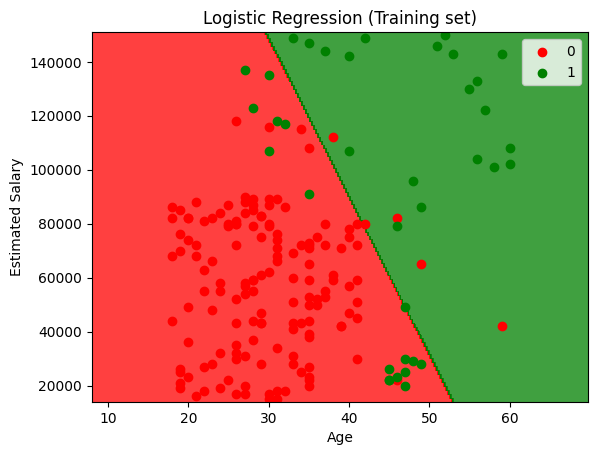

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Test set

C:\Users\r\AppData\Local\Temp\ipykernel_15560\3848652112.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


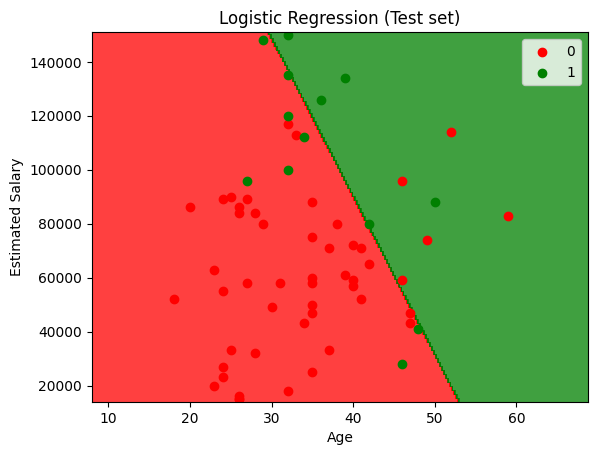

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Conclusion
#### The linear classifier has a difficult time classifying outlining observations with predictions